<div class="alert alert-success">
  <b> ✔️Комментарий ревьюера ✔️</b>

Привет, Максим! Меня зовут Михаил Майоров, я буду проверять твой проект. Предлагаю общаться на 'ты' :)
Однако, если это неудобно - сообщи, и мы перейдем на 'Вы'. Моя главная цель —  поделиться с тобой своим опытом и помочь тебе стать аналитиком данных, а не только указать на совершенные тобой ошибки.

Видно, что к проету приложен большой труд. Все ключевые этапы в работе выполнены, статистическое исследование проведено качественно. Так что в целом справиться с задачей тебе удалось.

Есть несколько аспектов, которые **требуют** твоего **внимания**. Комментарии по ним помечены красным цветом и символами ❌. После их доработки проект будет принят, осталось совсем немного :) 
    

Давай работать над проектом в диалоге: если **ты что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Мне будет легче отследить изменения, если ты будешь использовать синюю форму, которую я прикреплю ниже. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 



Жду проект на повторное ревью. Успехов в изучении!



</div>
<div class="alert alert-block alert-danger"> <b>❌ Комментарий ревьюера ❌</b> 
    Так я выделяю моменты, которые требуют особого внимания. Нужно будет учесть их и внести корректировки в свою работу. </div>
<div class="alert alert-block alert-warning"> <b>⚠️ Комментарий ревьюера ⚠️</b> 
    Желтым я отмечу рекомендации, которые, могут быть полезными при твоей работе. Они носят рекомендационный характер, но будет классно, если ты будешь учитывать их при работе.</div>
<div class="alert alert-block alert-success"> <b>✔️ Комментарий ревьюера ✔️</b>
    Так я выделяю удачные и элегантные решения, на которые можно опираться в будущих проектах.</div>
<div class="alert alert-block alert-info">
    
А в таком блоке ты можешь оставить комментарии для меня 
    
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Хорошее введение в проект - пригодится в будущем, когда соберешь большое портфолио и откроешь проект вновь👍

</div>


### Откройте файл с данными и изучите общую информацию. 

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from IPython.display import display
from collections import Counter

df = pd.read_csv('/datasets/real_estate_data.csv')
print(df.head())
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Загружаем данные из датафрейма, находим разделитель стобцов - "\t". После вывода таблицы можно заметить, что общее количество этажей в доме указано дробными числами, дата публикации имеет неудобный формат, также цены лучше указывать в миллионах.

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

После проверки количества данных в столбцах датафрейма можно заметить, что наибольшее количество Nan-ов в столбцах: `'ceiling_height'`, `'is_apartment'`, `'balcony'` и  `'parks_nearest'`, `'ponds_nearest'`. Также  `'floors_total'` и `'balcony'` должны быть целыми, т.к. дробные значения этого параметра невозоможны, `'first_day_exposition'` приведем к типу **date_time**.

0

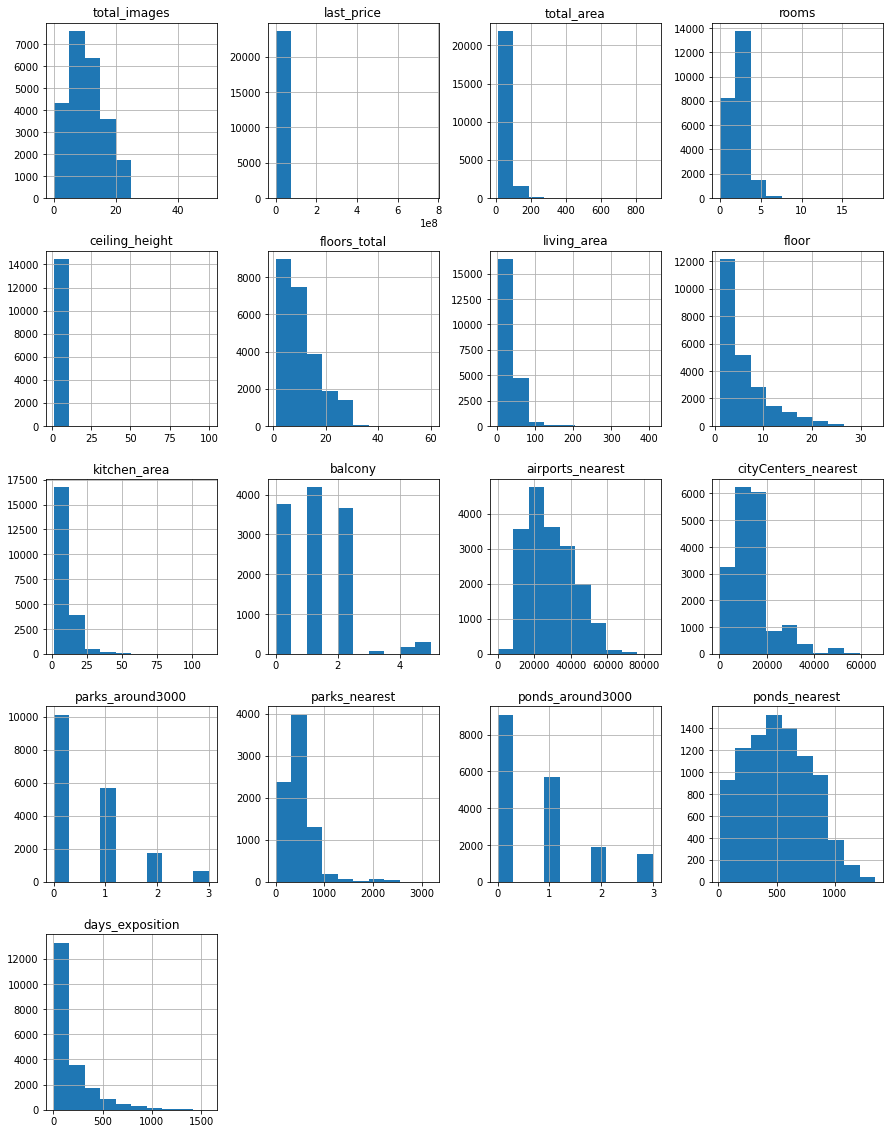

In [212]:
df.hist(figsize=(15, 20))
0

На гистрограммах можно увидеть много `выбросов и аномалий`, все это будет отработано и описано в следующих главах.

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Приступим к предобработке

</div>


### Предобработка данных

#### Обработка пропущенных значений и преведение типов

In [213]:
print(df.isna().sum()[df.isna().sum() != 0])

ceiling_height          9195
floors_total              86
living_area             1903
is_apartment           20924
kitchen_area            2278
balcony                11519
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
days_exposition         3181
dtype: int64


Рассмотрим столбцы по количеству пропущенных значений. Сразу видим два столбца - 'balcony' и 'is_apartment', если не указано их значение, то скорее всего балкон отсуствует и жилье не явлется апартаментами. Квартиры, где не указали локацию лучше удалить, так как местоположение один из самых главных параметров для анализа.

In [214]:
df['balcony'] = df['balcony'].fillna(0).astype('int64')
df['is_apartment'] = df['is_apartment'].fillna(False)
df = df.dropna(subset=['locality_name'])

Можно было заметить большое количество пропущенных значений в строке - `cityCenters_nearest`, часть из них следует устранить, если сгруппировать расстояния до центра по населенным пунктам и вычеслить их медиану, то можно было заполнить пропуски весьма вероятными значениями. Но до этого нужно убрать неявные дубликаты из `locality_name`, чтобы метод лучше обработал значения. 

In [215]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df['floors_total'] = df['floors_total'].fillna(0).astype('int64')

Приведем время в столбце `first_day_exposition` к единому типу времени, также сделаем значения в столбце `floors_total` целочисленными, заменив пропуски нулями, для корректной работы с числами.

In [216]:
print(df['ceiling_height'].sort_values().unique())
df.loc[df['ceiling_height'] >10 , 'ceiling_height'] = df.loc[df['ceiling_height'] >10 , 'ceiling_height']*0.1

[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3.8    3.82   3.83   3.84   3.85   3.86
   3.8

В столбце `ceiling_height` есть аномальные значения для высоты потолков в квартирах, можно предположить, что все значения выше 10 метров - это ошибка размерности на порядок, для исправления умножим данный столбец на **0.1**. Еще есть в списке высоты ниже 2 метров, по СНИПу такой высоты быть не может, значит данный значения можно убрать из анализа, также как и высоты больше 10 метров.

Также хорошо было бы заменить пропущенный значения `высоты потолков` в зависимости от `этажности дома`, даннуй гипотезу проверим вычислением корреляции высоты потолков от высоты зданий:

In [217]:
df_pivot = df.pivot_table(index ='floors_total', values = 'ceiling_height', aggfunc = 'mean').reset_index()
print(f"Корреляция высоты равна: {df_pivot['floors_total'].corr(df_pivot['ceiling_height'])}")

Корреляция высоты равна: -0.3387095259080621


Можно сделать вывод, что эти величины не коррелируют, т.к. коэффициент скорее близок к нулю. Значит пропущенные значения можно заполнить медианой.

In [218]:
df = df[((df['ceiling_height']>2) & (df['ceiling_height']<10)) |(df['ceiling_height'].isna() == True)]
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [219]:
cof_for_living = df['total_area'].median()/df['living_area'].median()
cof_for_kitchen = df['total_area'].median()/df['kitchen_area'].median()
df['living_area'] = df['living_area'].fillna(df['total_area']/cof_for_living)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']/cof_for_kitchen)
print("Количество пропусков по столбцам датафрейма:\n")
df.isna().sum()[df.isna().sum() != 0]

Количество пропусков по столбцам датафрейма:



airports_nearest        5525
cityCenters_nearest     5502
parks_around3000        5501
parks_nearest          15574
ponds_around3000        5501
ponds_nearest          14553
days_exposition         3176
dtype: int64

Заполним пропуски в столбцах `living_area` и `kitchen_area`.

Для этого создадим переменную-коэффициент, которая будет равняться медианному соотношению общей площади к площади пропущенного участка (в нашем случае `living_area` и `kitchen_area`). После этого заполним все пропуски в этих столбцах медианной долей от общей площади для искомых участков, которые были не указаны. 

Как можно заметить, жилая площадь и площадь кухни пропала из списка столбцов с пропусками.

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   
   По столбцу `living_area` - иногда продавцы могут не указывать данное значение, однако, мы можем попробовать его вычислить. Нужно найти **соотношение медианной общей площади к медианной жилой**. А затем, заполнить пропуски в столбце `living_area` **отношением общей площади к найденному соотношению**.

  Со столбцом `kitchen_area` можно поступить так же, как со столбцом `living_area`.


</div>

<div class="alert alert-block alert-info">
    
Замечание учтено, корректировки **внесены**.
    
Небольшой вопрос, можно ли выводить датафрейм с отсупом от края, например табуляцией, для всех строк таблицы?
    <div class="alert alert-warning">

**⚠️ Комментарий ревьюера v2⚠️**
   
   Что ты имеешь ввиду? Продемонстрируй. Вообще, выводить датафреймы можно и без принта - они получаются нагляднее.

</div>



    
</div>

<div class="alert alert-block alert-info">
    
Продемонстрировать не могу, я имел ввиду, можно ли вывод таблицы сделать не по левому краю, а по середине окна вывода, или с каким-то отступом от края.
    <div class="alert alert-warning">

**⚠️ Комментарий ревьюера v3⚠️**
   
   Понял. Вот статья, в которой разбирается несколько способов форматирования вывода: https://stackoverflow.com/questions/17232013/how-to-set-the-pandas-dataframe-data-left-right-alignment
        

</div>



</div>

#### Поиск неявных дубликатов

Приступим к удалению неявных дубликатов в `названии городов`, для этого напишим функцию для автоматизированного выполнения этой задачи:

In [220]:
def partial_comparison(df, columns):
    a = ''
    i = []
    for key in df[columns].sort_values().unique():
        for values in key:
            if(values.isupper()==True): # если буква загланая мы итератор приравниваем к 1
                z = 1
            if ((z==1)) & (values!='\0'): # по условию выше начинаем копировать слово до символа конца строки
                a += values
        i.append(a)
        a = ''
        z=0
    return Counter(i)# считаем с помощью функции количество повторений насленных пунктов в массиве

cnt = dict(filter(lambda item: item[1]>1, partial_comparison(df,'locality_name').items()))
print(dict(sorted(cnt.items(), key = lambda item: item[1], reverse = True)))

{'Мурино': 3, 'Павлово': 3, 'Рощино': 3, 'Рябово': 3, 'Кудрово': 2, 'Любань': 2, 'Никольское': 2, 'Большая Ижора': 2, 'Янино-1': 2, 'Лесогорский': 2, 'Мга': 2, 'Назия': 2, 'Советский': 2, 'Фёдоровское': 2, 'Гарболово': 2, 'Зимитицы': 2, 'Калитино': 2, 'Рабитицы': 2, 'Щеглово': 2, 'Лесное': 2, 'Аннино': 2, 'Бугры': 2, 'Возрождение': 2, 'Гаврилово': 2, 'Громово': 2, 'Жилгородок': 2, 'Ильичёво': 2, 'Кобралово': 2, 'Коробицыно': 2, 'Лисий Нос': 2, 'Мельниково': 2, 'Мичуринское': 2, 'Новый Свет': 2, 'Пансионат Зелёный Бор': 2, 'Перово': 2, 'Петровское': 2, 'Победа': 2, 'Поляны': 2, 'Старая Малукса': 2, 'Стеклянный': 2, 'Сумино': 2, 'Тельмана': 2, 'Терволово': 2, 'Усть-Луга': 2, 'Вырица': 2, 'Красный Бор': 2, 'Кузьмоловский': 2, 'Лебяжье': 2, 'Приладожский': 2, 'Рахья': 2, 'Токсово': 2, 'Форносово': 2, 'Свердлова': 2, 'Вещево': 2, 'Приветнинское': 2}


Был получен словарь отсортированный по возрастанию количества дубликатов населенного пункта, и отфильтрованный для значений повторений **больше единицы**. Теерь можно присутпить замене всех повторящихся городов на один общий.

In [221]:
for x in cnt:
    if(cnt[x]>1):
        df['locality_name'] = df['locality_name']\
        .where(~(df['locality_name'].str.contains(x)),df[df['locality_name'].str.contains(x)]\
               .reset_index()\
               .loc[0,'locality_name'])
cnt = partial_comparison(df,'locality_name')
print(dict(filter(lambda item: item[1]>1, cnt.items()))) # проверка оставлись ли повторяющиеся города.

{}


Изменив датафрейм и применив к нему функцию поиска дубликатов, вывели отфильтрованный на единицу словарь, т.к. дубликатов больше нет он `пустой`.

In [222]:
cityCenters_group = df.groupby(by='locality_name')['cityCenters_nearest'].median().sort_values().reset_index() 
for city in cityCenters_group['locality_name']:
    df.loc[(df['locality_name'] == city), 'cityCenters_nearest'] = df.loc[(df['locality_name'] == city),'cityCenters_nearest']\
    .fillna(cityCenters_group.loc[cityCenters_group['locality_name'] == city,'cityCenters_nearest'].squeeze())
print(df.isna().sum()[df.isna().sum() != 0])

airports_nearest        5525
cityCenters_nearest     4820
parks_around3000        5501
parks_nearest          15574
ponds_around3000        5501
ponds_nearest          14553
days_exposition         3176
dtype: int64


 По результатам замены пропущенных значений в столбце `cityCenters_nearest ` - их количество уменьшилось с **5511** до **4820**, оставшиеся значения объясняются тем, что не во всех населенных пунктах есть хотя бы один объект со значением `расстояние до центра`, поэтому провести аналогию в таких случиях не получилось.

#### Устранение выбросов и аномалий

In [223]:
def del_cvartil(df, columns):
    Q1 = df[columns].quantile(q=0.25)
    Q3 = df[columns].quantile(q=0.75)
    IQR = Q3-Q1
    return df[((df[columns]<=Q3+1.5*IQR) & (df[columns]>=Q1-1.5*IQR))|(pd.isnull(df[columns]))]

for x in df.columns:
    if (((df.dtypes[x] == 'float64') | (df.dtypes[x] == 'int64'))&(x != 'ceiling_height')):# для всех численных значений кроме столбца 'ceiling_height' 
        df = del_cvartil(df,x)   

Удалим анамалии из датафрейма путем исключения всех выбросов, которые превышают полтора квартиля слева и справа от `Q1` и `Q3`, соотвественно. Анамалии не находились только в столбце `ceiling_height`, т.к. оттуда они были удалены вручную.

In [224]:
df = df.reset_index(drop= True)
print(df.isna().sum()[df.isna().sum() != 0])
display(df)

airports_nearest        4604
cityCenters_nearest     4118
parks_around3000        4593
parks_nearest          11163
ponds_around3000        4593
ponds_nearest          10687
days_exposition         2020
dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
1,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,9.1000,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
2,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,14.4000,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
3,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,6.5000,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
4,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,8.5000,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15280,3,5500000.0,52.0,2018-07-19,2,2.65,5,31.0,2,False,...,6.0000,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
15281,2,1350000.0,30.0,2017-07-07,1,2.65,5,17.5,4,False,...,6.0000,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
15282,14,3100000.0,59.0,2018-01-15,3,2.65,5,38.0,4,False,...,8.5000,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
15283,18,2500000.0,56.7,2018-02-11,2,2.65,3,29.7,1,False,...,9.9225,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


На данном этопе датафрейм содержит 15353 строк. Были удалены аномалии, заполнены пропуски, где это можно было сделать. Также были удалены строки из-за пропусков в которых они стали бесполезны для анализа, а неявные дубликаты в названиях насленных пунктов были обработаны.

<div class="alert alert-success">
✔️ Комментарий ревьюера ✔️ 
    
В целом, работа по предобработке проведена очень качественно. Можно еще сэкономить память, изменяя типы данных. Например, дополнительно изменить их у площадей квартир с float64 на float32.   
    
</div>    

### Посчитайте и добавьте в таблицу новые столбцы

In [225]:
df['price_per_square'] = df['last_price']/df['total_area']
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['price_per_square'] = df['last_price']/df['total_area']
df['floor_type'] = df['floor']
df['city_centers_km'] = np.floor(df['cityCenters_nearest']/1000).astype('Int64') 

In [226]:
for i in range(df['floor_type'].count()):
    if (df.loc[i,'floor'] == 1):
        df.loc[i,'floor_type'] = 'Первый'
    elif ((df.loc[i,'floor'] == df.loc[i,'floors_total'])&(df.loc[i,'floor'] != np.nan)&(df.loc[i,'floors_total'] != np.nan)):
            df.loc[i,'floor_type'] = 'Последний'
    else:
        df.loc[i,'floor_type'] = 'Другое'  

К датафрейму были добавлены столбцы : 
- **цена одного квадратного метра**
- **день недели публикации объявления**
- **месяц публикации объявления**
- **год публикации объявления**
- **тип этажа квартиры**
- **расстояние до центра города в километрах**

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   В данном блоке все верно👍

</div>


### Проведите исследовательский анализ данных

#### Изучение первичных зависимостей

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Общая площадь')]

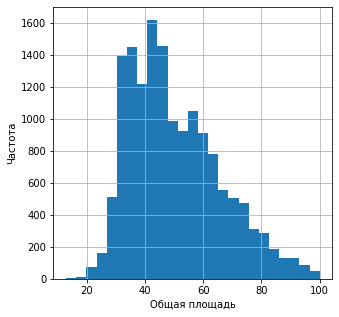

In [227]:
df['total_area'].hist(bins = 25,figsize = (5,5),grid = True).set(ylabel = 'Частота', xlabel = 'Общая площадь')

Рассмотри гистограмму общей площади, можно заметить что максимальное значение - 100кв.м. и распределение близко к нормальному, значит отбор анамалий был произведен верно. Можно сказать, что основная доля продаж, где частота больше 50% от максимальной, приходится на квартиры площадью `от 30кв.м до 60 кв.м`.

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Жилая площадь')]

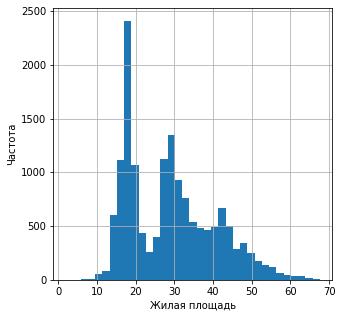

In [228]:
df['living_area'].hist(bins = 35,figsize = (5,5),grid = True).set(ylabel = 'Частота', xlabel = 'Жилая площадь')

Рассмотрим гистограмму жилой площади, тут заметны несколько пиков - `18 кв.в, 28 кв.м, 42 кв.м`. Основнвая доля продаж приходится на квартиры с жилой плщадью 18 кв.м и 29 кв.м.

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Площадь кухни')]

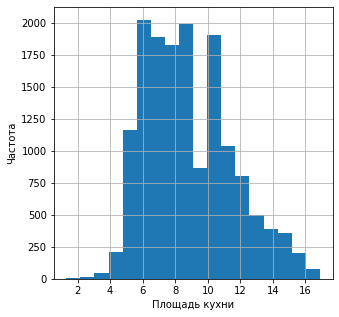

In [229]:
df['kitchen_area'].hist(bins = 18,figsize = (5,5),grid = True).set(ylabel = 'Частота', xlabel = 'Площадь кухни')

Рассмотри гистограмму площади кухни, максимальное значение для площади кухни в нашей выборке - это 18 кв.м. Распределение имеет два четких пика на 6 и 9 кв.м. Можно сказать, что основная доля продаж приходится на квартиры с площадью кухни  `от 5.5 кв.м до 11 кв.м`.

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Стоимость, млн.рублей')]

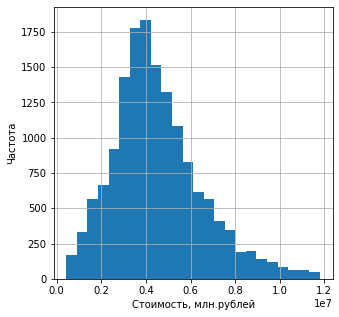

In [230]:
df['last_price'].hist(bins = 24,figsize = (5,5),grid = True).set(ylabel = 'Частота', xlabel = 'Стоимость, млн.рублей')

Рассмотри гистограмму стоимости квартир, данный график показывает нормальное распределение с пиком на `4 млн.рублей`. Самые дорогие квартиры продаются по цене `~12 млн.рублей`. Основная доля продаж приходится на квартиры стоимостью  `от 3 до 5 млн.рублей`.

124

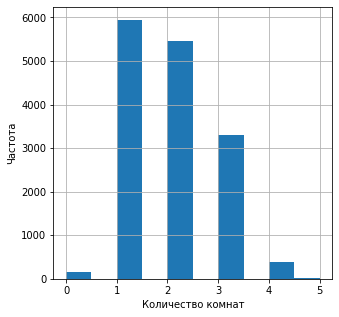

In [231]:
df['rooms'].hist(bins = 10,figsize = (5,5),grid = True).set(ylabel = 'Частота', xlabel = 'Количество комнат')
display(df['studio'].sum())

Рассмотри гистограмму по количеству квартит, можно увидеть что основная доля продаж приходится на `однокомнатные` и `двухкмонатные квартиры`. Меньше всего же покупают `4ех`, `5ти` комнатные квартиры и `студии(0 - комнат)`

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Высота потолков, м')]

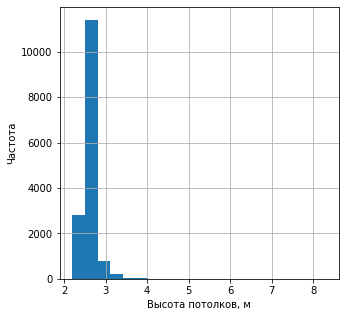

In [232]:
df['ceiling_height'].hist(bins = 20,figsize = (5,5),grid = True).set(ylabel = 'Частота', xlabel = 'Высота потолков, м')

Рассмотри гистограмму по высоте потолков, можно увидеть что основная доля продаж приходится на квартиры с высотой потолков `2,5 - 2,8 метров`, квартир же выше `2,8 метров` продают в разы меньше.

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Этаж')]

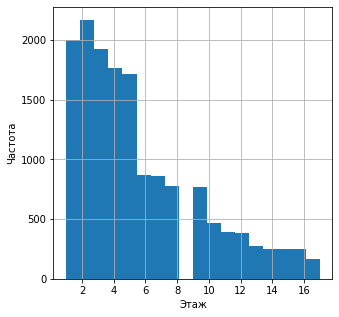

In [233]:
df['floor'].hist(bins = 18,figsize = (5,5),grid = True).set(ylabel = 'Частота', xlabel = 'Этаж')

Рассмотри гистограмму этажу квартир, можно увидеть что основная доля продаж приходится на квартиры на этажах `с первого по пятый`, меньшя же доля приходится на квартиры на этажах `с шестого по девятый`, квартир на более высоких этажах намного меньше. Это логично, так как у нас в стране преимущественное дома 5-ти этажки и 9-ти этажки.

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Этаж')]

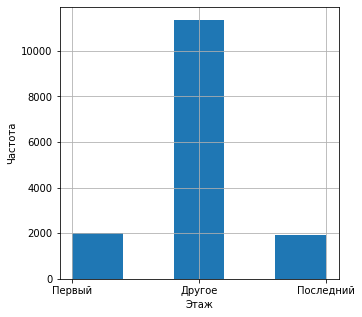

In [234]:
df['floor_type'].hist(bins = 5,figsize = (5,5),grid = True).set(ylabel = 'Частота', xlabel = 'Этаж')

Квартир на первом и последних этажах примерно одинаковое количество `~ две тысячи`. Примерно в **6** раз больше квартир продается на других этажах.

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Этажность дома')]

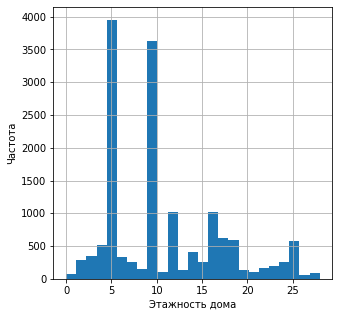

In [235]:
df['floors_total'].hist(bins =25,figsize=(5,5),grid = True).set(ylabel = 'Частота', xlabel = 'Этажность дома')

Рассмотрим гистограмму этажности домов, в основном продают квартиры в домах `пятью` и `девятью` этажами. Намного меньше квартир, но все равно существенно - около 1000 объявлений, находятся в домах с `12`, `16` и `25` этажами.

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Расстояние до центра, м')]

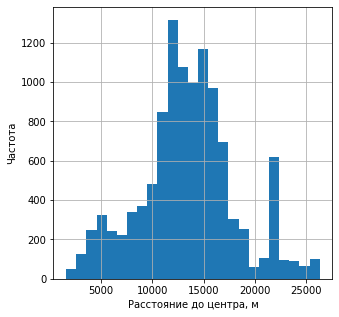

In [236]:
df['cityCenters_nearest'].hist(bins =25,figsize=(5,5),grid = True).set(ylabel = 'Частота', xlabel = 'Расстояние до центра, м')

Самое большое количество квартир продает на расстоянии `12 - 16 километров` от центра **Санкт-Петербурга**, еще можно заметить пик на расстоянии `22 километра`, скорее всего там находится крупный населенный пункт.

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Расстояние до аэропорта, м')]

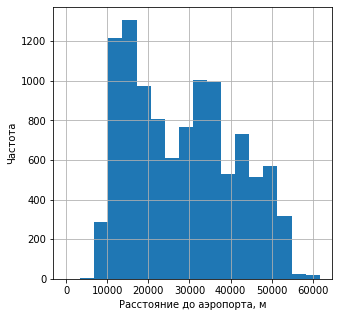

In [237]:
df['airports_nearest'].hist(bins =18,figsize=(5,5),grid = True).set(ylabel = 'Частота', xlabel = 'Расстояние до аэропорта, м')

Рассмотрев гистограмму расстояние до аэропорта, можно сказать, что в большинство квартир на продаже находится на расстоянии `от 10 до 20 километров`.  

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Расстояние до парка, м')]

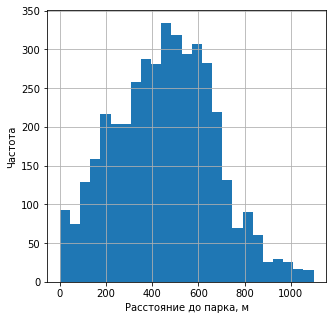

In [238]:
df['parks_nearest'].hist(bins =25,figsize=(5,5),grid = True).set(ylabel = 'Частота', xlabel = 'Расстояние до парка, м')

Рассмотрев гистограмму, можно сделать вывод, что в среднем для большинства квартир расстояние до парка `от 300 до 700 метров`. Это может обуславливаться законом о том, что рядом в ЖК должна быть лесопосадка.

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Месяцы')]

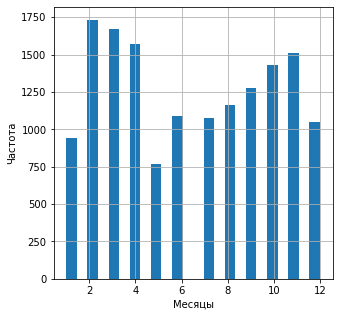

In [239]:
df['month'].hist(bins =24,figsize=(5,5),grid = True).set(ylabel = 'Частота', xlabel = 'Месяцы')

Рассмотрим гисторграмму частоты продаж от месяца года. Большинство продаж приходятся на `2,3,4 и 11 месяцы года`. Это говорит о том, что люди чаще всего покупают квартиры либо до нового года, либо сразу после.

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Год')]

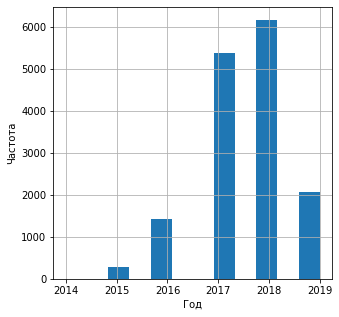

In [240]:
df['year'].hist(bins =12,figsize=(5,5),grid = True).set(ylabel = 'Частота', xlabel = 'Год')

Больше всего квартиры покупали в 2017 и 2018 году, в 2018 году купили на 10% больше квартир.

<div class="alert alert-success">
✔️ Комментарий ревьюера ✔️ 

Хороший результат. Хочу добавить, что обычно размеры двухкомнатных квартир составляют от 50 до 100 квадратных метров, что и соответствует проведенному анализу.
    
Могу посоветовать на будущее хорошую статью по оформлению графиков:
    https://devpractice.ru/matplotlib-lesson-3-3-text-elements/    
        
    
    
</div>

#### Изучение скорости продажи квартир

Медиана: 74.0
Среднее: 115.1
 
Количество дней за которое чаще всего продаются квартиры:

   days_exposition  floor
0             45.0    722
1             60.0    398
2              7.0    176
3             30.0    160
4              4.0    130
5              3.0    126
6              5.0    117
7             14.0    113
8              9.0    113
9             44.0    105


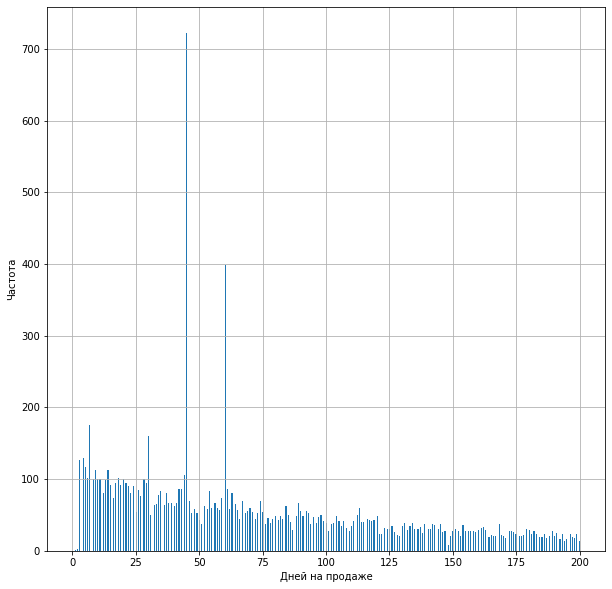

In [241]:
df['days_exposition'].hist(bins =450,figsize=(10,10), range =(0 , 200),grid = True).set(ylabel = 'Частота', xlabel = 'Дней на продаже')
print(f"Медиана: {df['days_exposition'].median()}")
print(f"Среднее: {df['days_exposition'].mean():.1f}\n ")
print(f"Количество дней за которое чаще всего продаются квартиры:\n\n{df.groupby(by = 'days_exposition').count()['floor'].sort_values(ascending = False).reset_index().head(10)}")

Наиболее вероятно, что квартира продастся за количество дней `близкое к 74`, для расчета нужно применять медиану, так как это распределение не нормальное и среднее с медианой уже не совпадают.

На графике заметны два сильных выброса для значений `days_exposition` равных `45 и 60 дням`, как видно из таблицы. Из-за того, что значения обладают кратностью можно сказать, что это далеко не совпадение. Сделаем предположение, что у **Яндекс.Недвижимости** есть ограничение на сроки публикации для разных типов объявлений, в данной случае закрытие объявления это необязательно продажа. 

Данная гипотеза оказывается верной и подтверждается данными из [Яндекс.Справки](https://yandex.ru/support/realty/owner/home/add-ads-housing.html). Действительно для квартир ценой `до 4,5 млн.рублей` срок публикации составляет **45 дней**, а для квартир `от 4,5 до 10 млн. рублей` — срок публикации **60 дней**. Опираясь на аналитику специалистов *Яндекс.Недвижимости* - квартиры `до 4.5 млн.` обычно продаются за **45 дней**, а квартиры `до 10 млн.` продаются за **60 дней**.

- Необычно долгими можно считать продажи `дольше 115 дней`. 
- Необычно быстрыми продажами можно считать квартиры проданные меньше, чем `за 45 дней`.

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   На графике заметен выброс - рассмотри этот столбец детальнее. Какие выводы сможешь сделать?

</div>


<div class="alert alert-block alert-info">
    
Замечание учтено, корректировки **внесены**.
    
</div>

#### Исследование факторов, которые больше всего влияют на полную стоимость объекта

Разница между максимумом и минимумом: 3195000.0


rooms,count,median
0,159,2700000.000000
1,5943,3550000.000000
2,5466,4500000.000000
3,3306,5500000.000000
4,394,5895000.000000
5,17,5250000.000000


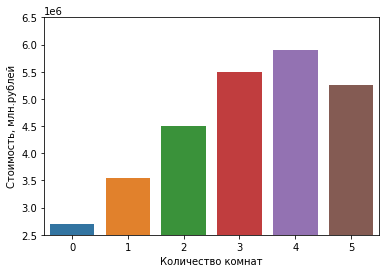

In [242]:
df_pivot = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['count','median']) 
df_pivot.columns = ['count','median']
print(f"Разница между максимумом и минимумом: {df_pivot['median'].max()-df_pivot['median'].min()}")

sb.barplot(x = df_pivot.index, y = df_pivot['median'])\
.set(ylabel = 'Стоимость, млн.рублей', xlabel = 'Количество комнат', ylim = (2.5e6,6.5e6))

df_pivot.reset_index().style.set_properties(**{"text-align": "center"})\
        .hide_index()\
        .set_table_styles([{"selector": "th" , "props": [("text-align","center")]}])

Самыми дорогоми квартирами явлвяются `4ех комнатные`. Цены `Пяти-комнатных` квартир нельзя считать реальными, так как выборка состоит всего из 18 квартир, что намного меньше в сравнении с другими категориями. Разница в цене в зависимости от комнатности составляет более **трех миллионов**.

Все корреляционные зависимости будут рассмотрены подробнее к концу блока исследования.

In [243]:
def categorize_income(income, series):
    q = series.max() - series.min()
    try:
        if series.min() <= income <= q*0.25:# до 16 кв.м
            return 'A'
        elif q*0.25 < income <= q*0.5:# от 16 до 33 кв.м
            return 'B'
        elif q*0.5< income <= q*0.75:# от 33 кв.м до 50 кв.м
            return 'C'
        elif q*0.75 < income <= q*1:# от 50кв.м до 67 кв.м
            return 'D'
    except:
        pass

Разница между максимумом и минимумом: 4140000.0


living_area_category,count,median
A,1642,3350000.000000
B,8642,3850000.000000
C,4187,5500000.000000
D,804,7490000.000000


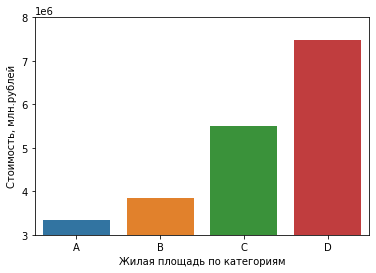

In [244]:
df['living_area_category'] = df['living_area'].apply(categorize_income,series = df['living_area'])
df_pivot = df.pivot_table(index = 'living_area_category', values = 'last_price', aggfunc = ['count','median']) 
df_pivot.columns = ['count','median']
print(f"Разница между максимумом и минимумом: {df_pivot['median'].max()-df_pivot['median'].min()}")
plot = sb.barplot(x = df_pivot.index, y = df_pivot['median'])\
.set(ylabel = 'Стоимость, млн.рублей', xlabel = 'Жилая площадь по категориям',ylim = (3e6,8e6))

df_pivot.reset_index().style.set_properties(**{"text-align": "center"})\
        .hide_index()\
        .set_table_styles([{"selector": "th" , "props": [("text-align","center")]}])

С ростом жилой площади сильно растет цена на квартиру. Небольшим исключением являются квартиры в категориях `до 16кв.м` и `от 16 до 33 кв.м`, цены на которые слабо растут в зависимости от площади в связи с малой площадью и спросом на такое жилье.

Разброс значений достигает 4ех миллионов.

Разница между максимумом и минимумом: 4651350.0


total_area_category,count,median
A,44,1900000.000000
B,5983,3450000.000000
C,6553,4600000.000000
D,2350,6551350.000000


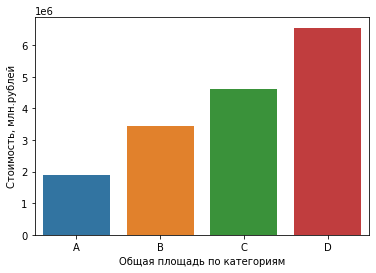

In [245]:
df['total_area_category'] = df['total_area'].apply(categorize_income,series = df['total_area'])
df_pivot = df.pivot_table(index = 'total_area_category', values = 'last_price', aggfunc = ['count','median']) 
df_pivot.columns = ['count','median']
print(f"Разница между максимумом и минимумом: {df_pivot['median'].max()-df_pivot['median'].min()}")
plot = sb.barplot(x = df_pivot.index, y = df_pivot['median'])\
.set(ylabel = 'Стоимость, млн.рублей', xlabel = 'Общая площадь по категориям')

df_pivot.reset_index().style.set_properties(**{"text-align": "center"})\
        .hide_index()\
        .set_table_styles([{"selector": "th" , "props": [("text-align","center")]}])

Разница между максимумом и минимумом: 3845545.5


kitchen_area_category,count,median
A,70,2100000.000000
B,5729,3600000.000000
C,7201,4500000.000000
D,2082,5945545.500000


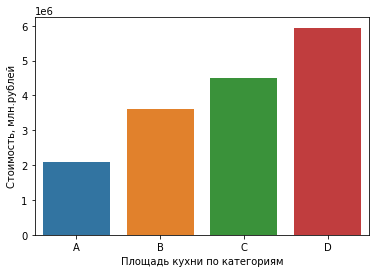

In [246]:
df['kitchen_area_category'] = df['kitchen_area'].apply(categorize_income,series = df['kitchen_area'])
df_pivot = df.pivot_table(index = 'kitchen_area_category', values = 'last_price', aggfunc = ['count','median']) 
df_pivot.columns = ['count','median']
print(f"Разница между максимумом и минимумом: {df_pivot['median'].max()-df_pivot['median'].min()}")
plot = sb.barplot(x = df_pivot.index, y = df_pivot['median'])\
.set(ylabel = 'Стоимость, млн.рублей', xlabel = 'Площадь кухни по категориям')

df_pivot.reset_index().style.set_properties(**{"text-align": "center"})\
        .hide_index()\
        .set_table_styles([{"selector": "th" , "props": [("text-align","center")]}])

Цена квартиры в зависимости от площади кухни растет слабее, чем в предыдущих параметрах, разброс значений достигает более `3.8 миллионов`. 

Разница между максимумом и минимумом: 800000.0


floor_type,count,median
Другое,11350,4400000.000000
Первый,1999,3600000.000000
Последний,1936,3700000.000000


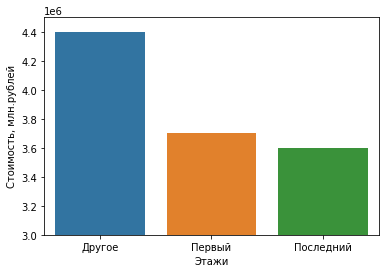

In [247]:
df_pivot = df.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['count','median']) 
df_pivot.columns = ['count','median']
plot = sb.barplot(x = df_pivot.index, y = df_pivot['median'].sort_values(ascending=False))\
.set(ylabel = 'Стоимость, млн.рублей', xlabel = 'Этажи', ylim =(3e6,4.5e6))
print(f"Разница между максимумом и минимумом: {df_pivot['median'].max()-df_pivot['median'].min()}")

df_pivot.reset_index().style.set_properties(**{"text-align": "center"})\
        .hide_index()\
        .set_table_styles([{"selector": "th" , "props": [("text-align","center")]}])

Цена на квартиры находящиеся на средних этажах обычно выше на 20%, чем квартиры на крайних этажах (первый и последний).

Это можно объяснить, тем что близость к чердаку и долгий подъем в домах без лифта - может снизить цену квартир на последнем этаже. А громкий звук с улицы и из подъезда, вероятность затопления - может снизить цену квартир на первом этаже.

Разница между максимумом и минимумом: 3400000.0


year,count,median
2014,7,7500000.000000
2015,270,4255000.000000
2016,1415,4100000.000000
2017,5362,4100000.000000
2018,6158,4200000.000000
2019,2073,4600000.000000


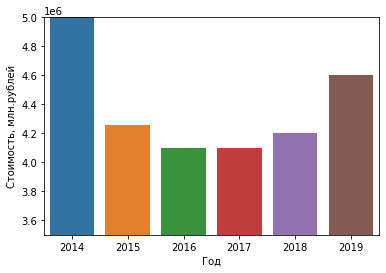

In [248]:
df_pivot = df.pivot_table(index = 'year', values = 'last_price', aggfunc = ['count','median']) 
df_pivot.columns = ['count','median']
print(f"Разница между максимумом и минимумом: {df_pivot['median'].max()-df_pivot['median'].min()}")
plot = sb.barplot(x = df_pivot.index, y = df_pivot['median'])\
.set(ylabel = 'Стоимость, млн.рублей', xlabel = 'Год',ylim =(3.5e6,5e6))


df_pivot.reset_index().style.set_properties(**{"text-align": "center"})\
        .hide_index()\
        .set_table_styles([{"selector": "th" , "props": [("text-align","center")]}])

Цены квартир в `2014` году нельзя считать релевантными, так как в этом году выборка всего за 7 квартир - можем отобросить эти значения, также в `2015` году выборка мала.

Значительный рост начинается `после 2017 года`, за промежуток `2017-2018` цена на недвижимость выросли на **2.5%**, а в промежуток `с 2018 по 2019` цены выросли на **целых 10%**.

Можно заметить, что со временем цены на недвижимость растут - это объясняется `ростом инфляции` и другими факторами подорожания земли и цен на строй материалы.

Разница между максимумом и минимумом: 400000.0


month,count,median
1,942,4200000.000000
2,1732,4200000.000000
3,1673,4290000.000000
4,1573,4400000.000000
5,770,4200000.000000
6,1089,4000000.000000
7,1079,4150000.000000
8,1161,4200000.000000
9,1277,4250000.000000
10,1430,4185000.000000


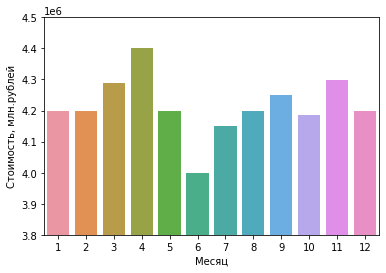

In [249]:
df_pivot = df.pivot_table(index = 'month', values = 'last_price', aggfunc = ['count','median']) 
df_pivot.columns = ['count','median']
print(f"Разница между максимумом и минимумом: {df_pivot['median'].max()-df_pivot['median'].min()}")
plot = sb.barplot(x = df_pivot.index, y = df_pivot['median'])\
.set(ylabel = 'Стоимость, млн.рублей', xlabel = 'Месяц',ylim =(3.8e6,4.5e6))

df_pivot.reset_index().style.set_properties(**{"text-align": "center"})\
        .hide_index()\
        .set_table_styles([{"selector": "th" , "props": [("text-align","center")]}])

Макисмальный разброс цен равен `400 тыс.рублей` в зависимости от месяца продажи. Разброс составляет меньше `10 процентов` от цены, можно сказать, что зависимость слабая.

Дороже всего квартиры продаются в `апреле и ноябре`, это может быть связано с **налоговой отчетностью** в апреле и приближением **нового года** в ноябре. 

Самые низкие цены наблюдаются в `июне и июле`, скорее всего это связано с **сезоном отпусков** и **выездами загород**, что `снижает спрос` на квартиры летом.

Разница между максимумом и минимумом: 150000.0


weekday,count,median
0,2319,4300000.000000
1,2698,4200000.000000
2,2572,4250000.000000
3,2717,4200000.000000
4,2594,4150000.000000
5,1285,4217000.000000
6,1100,4200000.000000


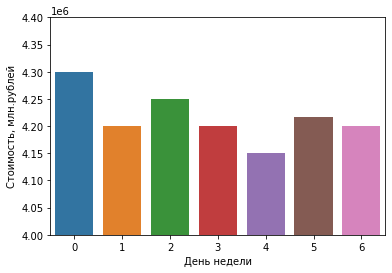

In [250]:
df_pivot = df.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['count','median']).reset_index() 
df_pivot.columns = ['weekday','count','median']

print(f"Разница между максимумом и минимумом: {df_pivot['median'].max()-df_pivot['median'].min()}")
plot = sb.barplot(x = df_pivot['weekday'], y = df_pivot['median'])\
.set(ylabel = 'Стоимость, млн.рублей', xlabel = 'День недели',ylim =(4e6,4.4e6))
df_pivot.style.set_properties(**{"text-align": "center"})\
        .hide_index()\
        .set_table_styles([{"selector": "th" , "props": [("text-align","center")]}])

В зависимости цены от дня недели прослеживается слаба зависимость, квартиры продаются с разбросом в `150 тыс.рублей`, это `4 процента` от медианной цены.

**Дороже** всего квартиры продаются в `понедельник`, скорее всего потому что большинство банков открывается в понедельник, проходят расчетный операции. Также этот день может быть удобен, как начало недели.

В остальные же дни прослеживается *моностонность* с `минимальным разбросом`.

#### Выбор фактора, который сильнее всего влияет на полную стоимость объектов

После рассмотрения всех факторов - исследуем **корреляционные зависимости** параметров, которые сильнее всего влияют на цену квартиры и определим `преобладающий`:

Корреляция цены от количества комнат: 0.40
Корреляция цены от площади кухни: 0.47
Корреляция цены от жилой площади: 0.53
Корреляция цены от общей площади: 0.65


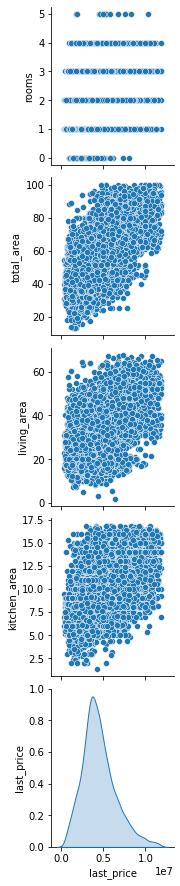

In [251]:
plot = sb.pairplot(df[['rooms','total_area','living_area','kitchen_area', 'last_price']], diag_kind='kde', x_vars = 'last_price')
print(f"Корреляция цены от количества комнат: {df['rooms'].corr(df['last_price']):.2f}")
print(f"Корреляция цены от площади кухни: {df['kitchen_area'].corr(df['last_price']):.2f}")
print(f"Корреляция цены от жилой площади: {df['living_area'].corr(df['last_price']):.2f}")
print(f"Корреляция цены от общей площади: {df['total_area'].corr(df['last_price']):.2f}")

По графику можно заметить, что сильнее всего коррелирует `общая площадь` со `стоимости жилья`(образует направленный фронт точек), для жилой площади и площади кухни эта зависимость прослеживается слабее. 

Это подтверждается прямым вычислением `корреляции`, для зависимости стоимости от общей площади она равняется **0.65**, что больше чем для других зависимостей.

<div class="alert alert-danger">

**❌ Комментарий ревьюера ❌**
   
   Рекомендую воспользоваться методом `pairplot` из библиотеки `seaborn` - показывает корреляционные зависимости величин более наглядно. 
    Официальная документация: https://seaborn.pydata.org/generated/seaborn.pairplot.html

</div>


<div class="alert alert-block alert-info">
    
Я дополнил вывод к графиков времени(день, месяц, год), сделал графики более наглядными.
    
Но мне не очень понятно, как можно сделать лучше с помощью метода pairplot. Для примера я использвал его выше для тех переменных, где зависимость прослеживалась слабее всего(использовал 'hist' т.к. 'scatter' не дает понять концентрацию точек на одной прямой). Но не понимаю как его применить тут.
    
</div>

<div class="alert alert-warning">

**⚠️ Комментарий ревьюера v2⚠️**
   
   


   
   Здесь имеется ввиду, что необходимы корреляции цены и параметров квартиры (там, где они уместны - площади, число комнат). 
Столбчатые графики по столбцам дня недели, месяца и года изначально правильные и отражают зависимость. Так что pairplot попрошу перестроить по остальным параметрам.
</div>


<div class="alert alert-block alert-info">
    
Замечание учтено, корректировки **внесены**.
    
</div>

<div class="alert alert-success">

**✔️ Комментарий ревьюера v3✔️**
   
   Исправлено👍

</div>


#### Поиск населённых пунктов с самой высокой и низкой стоимостью квадратного метра

locality_name,count,mean
Санкт-Петербург,10236,104266.036883
деревня Кудрово,340,96342.619348
посёлок Парголово,202,89474.741113
посёлок Мурино,441,86431.722703
посёлок Шушары,189,81019.860252
деревня Новое Девяткино,120,76379.102718
Гатчина,258,68705.699842
Всеволожск,330,67080.737121
Выборг,195,58352.132558
Кириши,115,38980.499950


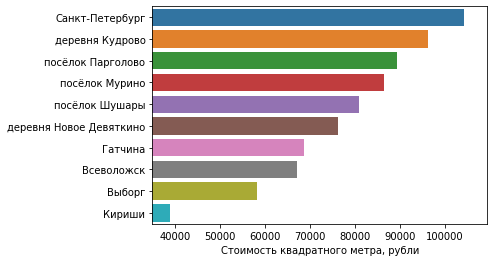

In [252]:
locality_price = df.pivot_table(index = 'locality_name', values = ['price_per_square'] , aggfunc = ['count', 'mean']).reset_index()
locality_price.columns = ['locality_name','count','mean']
locality_price = locality_price.sort_values(by = 'count', ascending = False).reset_index(drop=True)[locality_price.index<10].sort_values(by = 'mean',ascending = False)
plot = sb.barplot(x = locality_price['mean'], y = locality_price['locality_name'])\
.set(ylabel = '', xlabel = 'Стоимость квадратного метра, рубли',xlim =(35e3))
locality_price.style.set_properties(**{"text-align": "center"})\
        .hide_index()\
        .set_table_styles([{"selector": "th" , "props": [("text-align","center")]}])

Самая большая цена квадратного метра в региональном центре - **Санкт-Петербурге**, в среднем квадратный метр стоит `104 тыс.рублей`.

Самая низкая цена квадратного метра в городе **Кириши**, в среднем квадратный метр стоит `39 тыс.руб`.

**Кудрово** и **Парголово** отстают всего на `10тыс.рублей` от **Санкт-Петербурга** по цене за квадратный метр. 

<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Наглядно👍

</div>


####  Зависимость стоимости объектов от расстояния до центра города

city_centers_km,mean,count
1,116039.377895,17
2,117628.340770,58
3,114155.969032,177
4,122466.467589,319
5,121724.000763,297
6,116677.724217,208
7,116657.317054,232
8,109331.478759,379
9,105179.110160,465
10,103815.386228,635


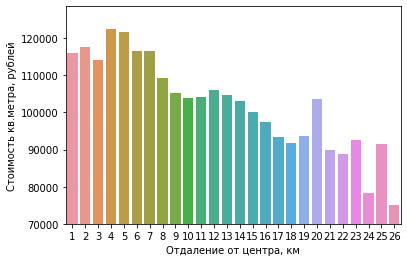

In [253]:
price_km = df[df['locality_name']=='Санкт-Петербург'].sort_values(by = 'city_centers_km')
price_km = price_km.pivot_table(index = 'city_centers_km', values = 'price_per_square', aggfunc = ['mean','count'])
price_km.columns = ['mean','count']
plot = sb.barplot(x = price_km.index, y = price_km['mean'])\
.set(ylabel = 'Стоимость кв.метра, рублей', xlabel = 'Отдаление от центра, км', ylim = (70e3))
price_km.reset_index()\
        .style.set_properties(**{"text-align": "center"})\
        .hide_index()\
        .set_table_styles([{"selector": "th" , "props": [("text-align","center")]}])

Чем дальше от центра города - тем дешевле стоит квадратный метр. Максимальная разница в цене состовляет `47 тыс.рублей` - это падение примерно на `40 процентов` между ценой квадратного метра в **центре** и **на окраине** города.
Зависимость может быть неравномерной из-за того, что `недостаточно данных для анализа` в некоторых областях, также в некоторых  местах могут быть `элитные ЖК`, которые в среднем намного дороже и создают повышение цен.

<div class="alert alert-success">
✔️ Комментарий ревьюера ✔️

Верно. На графике в районе 7 км заметно, что цена меняется. Это возможный центр города.
    
Если интересно, то самый дорогой по стоимости жилья район в Санкт-Петербурге риелторы назвали "Золотой треугольник". Дома "Золотого треугольника" находятся в пределах Невского проспекта, набережной реки Фонтанки и Дворцовой набережной.
Для географической справки: https://zen.yandex.ru/media/id/5cb4ebcc0a51a300b5b1f60d/zolotoi-treugolnik-sanktpeterburga-chto-eto-i-gde-nahoditsia-5edf942db1204610073e88b2 

</div>

### Общий вывод

В данном проекте основной задачей являлося анализ данных о продажах недвижимость в Санкт-Петербурге и пригородах, данные предоставлены сервисом **Яндекс Недвижимость**. Нужно было предобработать данные и изучить их, также найти интересные особенности и зависимости, которые существуют на рынке недвижимости.


Во время предобработки данных были решены проблемы с пропусками в информации о `количестве балконов`, `наличии апартаментов`, `высоте потолков`, `количестве этажей в домах`, были дополнены пропущенные значения `расстояние до центра` для некоторых строк. Также столбец `first_day_exposition` был приведен к типу `date_time`. Было найдено множество неявных дубликатов в `названии населенных пунктов`. Все аномалии и выбросы были устранены.

В резлультате анализа влияения ряда критериев на продажи квартир в Санкт-Петербурге, можно сделать некоторые выводы:
- Основная доля продаж, приходится на квартиры:  
    - С общей площадью `от 30кв.м до 60 кв.м.`
    - С жилой плщадью `от 18 кв.м и 29 кв.м.` 
    - С площадью кухни `от 5.5 кв.м до 11 кв.м`
    - С высотой потолков `от 2,5 - 2,8 метров`

- Большинство квартир продают в домах с пятью и девятью этажами, данный тип застройки в России преобладает.
- Большая часть квартир продается в 12 - 16 километрах от центра Санкт-Петербурга
- Для большинства квартир расстояние до парка составлет от 300 до 700 метров

Также прослеживает ряд тенденций:
- У многих объявлений ограничен срок размещения, для квартир `дешевле 4.5 млн` - **45 дней**, для квартир `до 10 млн` - **60 дней**. Обычно объявление снимают за количество дней близкое к **74-ем**.
- `Общая площадь` является фактором, который *сильнее всего влияет на стоимость объекта*, ее корреляционная зависимость от цены - **0.65**. Цена растет в среднем на **полтора миллиона** в зависимости от категории общей площади.
- Дешевле всего квартиры, которые находятся не на **крайних этажах**.
- С каждым `годом` недвижимость **дороже**, так как инфляция растет.
- Самая низкая стоимость кв.метра в насленном пункте Кириши и равняется `38 тыс.руб.`, а самая дорогая стоимость кв.метра в Санкт-Петербурге - `104 тыс.рублей`.
- В среднем с каждым километром удаления от центра цена квадратного метра падает на `3.5 тыс.рублей`. И чем дальше от центра квартира находится, тем **дешевле** там недвижимость.

Предложен ряд рекодмендаций для заказчика: 
- Улучшить методы картографическии для вычисления расстояние до определенных объектов, так как в этих столбцах свыше 20% проспусков.
- Создать единый список наименований населеных пунктов для выбора пользователем, для избежания неявных дубликатов.
- Определить среднее расстояние до региональных центров для разных насленых пунктов, так как в некоторых группах нет ни одного значения в этом столбце.


<div class="alert alert-success">

**✔️ Комментарий ревьюера ✔️**
   
   Максим, проведен основательный и подробный анализ. Все наглядно - графики и гистограммы подтверждают обоснованные выводы. Учти мои замечания. Возможно, придется немного подправить выводы. Жду твой проект на повторное ревью. Успехов!

</div>


<div class="alert alert-success">

**✔️ Комментарий ревьюера v3✔️**
   
   Максим, замечания устранены 👍. Уверен, мои советы пригодятся тебе в новых проектах. Успехов в обучении! 😉 

</div>

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод